In [134]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


In [135]:
from datasets import load_dataset

ds = load_dataset("BruceParker/AIR_QUALITY_PREDICTION")

In [136]:
df=ds
df=df["train"].to_pandas()

In [137]:
df.head()

,co2,lpg,co,target
0,622.0,25.0,68.0,Normal
1,1082.0,4.0,29.0,Abnormal
2,1141.0,100.0,44.0,Abnormal
3,429.0,34.0,69.0,Normal
4,581.0,89.0,57.0,Normal


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133 entries, 0 to 5132
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     5133 non-null   float64
 1   lpg     5133 non-null   float64
 2   co      5133 non-null   float64
 3   target  5133 non-null   object 
dtypes: float64(3), object(1)
memory usage: 160.5+ KB


In [139]:
df.duplicated().sum()

np.int64(1)

In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df.columns

Index(['co2', 'lpg', 'co', 'target'], dtype='object')

In [142]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import LabelEncoder

model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer([("num", StandardScaler(), numerical_columns)])),
    ('classifer', LogisticRegression())
])

In [143]:
x=df.drop("target",axis=1)
y=df[["target"]]

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [145]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['co2', 'lpg', 'co'])])),
                ('classifer', LogisticRegression())])

In [147]:
logistic_y_predict=model.predict(x_test)

In [149]:
from sklearn.metrics import accuracy_score

logistic_accuracy = accuracy_score(logistic_y_predict, y_test)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.8588


In [167]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded_svc = le.fit_transform(y_train.iloc[:,0])
y_test_encoded_svc = le.transform(y_test.iloc[:,0])

svc=SVC()
svc.fit(x_train,y_train_encoded_svc)
svc_predict=svc.predict(x_test)

from sklearn.metrics import r2_score
svc_score=r2_score(svc_predict,y_test_encoded_svc)
print(f"SVC R2 Score: {svc_score:.4f}")

SVC R2 Score: 0.6217


In [168]:
import torch
import torch.nn as nn
import torch.optim as optim


class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),

            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.network(x)

def train_network(x_data, y_data, epochs):
    # Ensure data is in the correct format for PyTorch
    x_tensor = torch.tensor(x_data.values, dtype=torch.float32)
    y_tensor = torch.tensor(y_data.values, dtype=torch.float32).view(-1, 1) # Ensure y is a column vector

    input_size = x_tensor.shape[1]
    model = RegressionNN(input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs): # Loop through range of epochs
        optimizer.zero_grad()
        outputs = model(x_tensor) # Use x_tensor
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0: # Print every 5 epochs
            print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

    return model

In [169]:
from sklearn.preprocessing import LabelEncoder

le_nn = LabelEncoder()

y_encoded_nn = le_nn.fit_transform(y.iloc[:, 0])

neural_networl=train_network(x, pd.DataFrame(y_encoded_nn), 1000)

Epoch 10, Loss: 0.3277
Epoch 20, Loss: 0.2190
Epoch 30, Loss: 0.1685
Epoch 40, Loss: 0.1525
Epoch 50, Loss: 0.1330
Epoch 60, Loss: 0.1242
Epoch 70, Loss: 0.1151
Epoch 80, Loss: 0.1058
Epoch 90, Loss: 0.1047
Epoch 100, Loss: 0.0975
Epoch 110, Loss: 0.0944
Epoch 120, Loss: 0.0909
Epoch 130, Loss: 0.0887
Epoch 140, Loss: 0.0862
Epoch 150, Loss: 0.0824
Epoch 160, Loss: 0.0826
Epoch 170, Loss: 0.0799
Epoch 180, Loss: 0.0780
Epoch 190, Loss: 0.0755
Epoch 200, Loss: 0.0723
Epoch 210, Loss: 0.0794
Epoch 220, Loss: 0.0738
Epoch 230, Loss: 0.0728
Epoch 240, Loss: 0.0708
Epoch 250, Loss: 0.0652
Epoch 260, Loss: 0.0714
Epoch 270, Loss: 0.0666
Epoch 280, Loss: 0.0646
Epoch 290, Loss: 0.0651
Epoch 300, Loss: 0.0652
Epoch 310, Loss: 0.0645
Epoch 320, Loss: 0.0672
Epoch 330, Loss: 0.0626
Epoch 340, Loss: 0.0615
Epoch 350, Loss: 0.0582
Epoch 360, Loss: 0.0570
Epoch 370, Loss: 0.0592
Epoch 380, Loss: 0.0578
Epoch 390, Loss: 0.0586
Epoch 400, Loss: 0.0557
Epoch 410, Loss: 0.0580
Epoch 420, Loss: 0.0573
E

In [170]:
neural_networl.eval()
with torch.no_grad():
    x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
    nn_predictions = neural_networl(x_test_tensor).numpy()

print(nn_predictions)

[[0.02663004]
 [0.98476815]
 [0.09959988]
 ...
 [1.0042834 ]
 [0.9899713 ]
 [0.01808009]]


In [171]:
# Encode y_test for evaluation with neural network predictions
y_test_encoded_nn = le_nn.transform(y_test.iloc[:, 0])

network_score=r2_score(nn_predictions, y_test_encoded_nn)

In [172]:
network_score

0.946613609790802

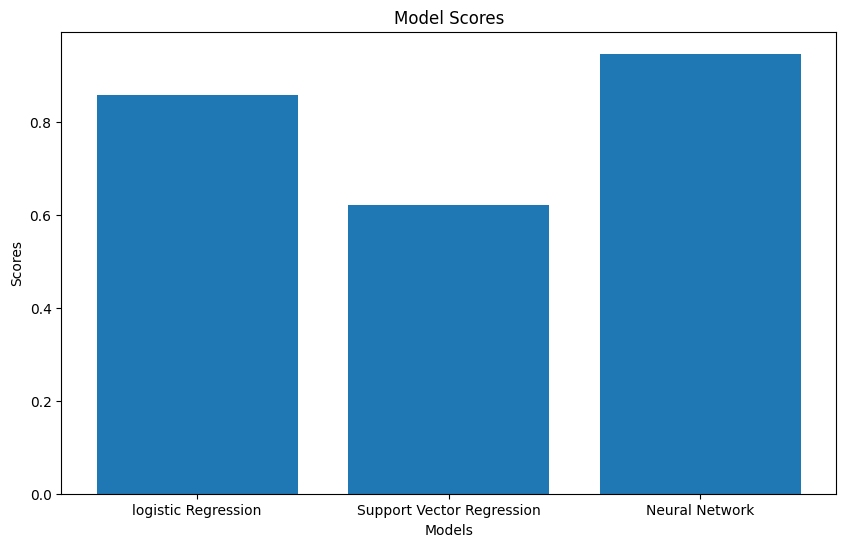

In [173]:
plt.figure(figsize=(10, 6))
plt.bar(['logistic Regression', 'Support Vector Regression', 'Neural Network'], [logistic_accuracy, svc_score, network_score])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Scores')
plt.show()

In [ ]:
#saving the models



In [174]:
import joblib
import torch

# Save the Logistic Regression model
joblib.dump(model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")



# Save the Neural Network model
torch.save(neural_networl.state_dict(), 'neural_network_model.pth')
print("Neural Network model saved as 'neural_network_model.pth'")

Logistic Regression model saved as 'logistic_regression_model.pkl'
Neural Network model saved as 'neural_network_model.pth'


In [175]:
# Save the SVR model
joblib.dump(svc, 'svc_model.pkl')
print("SVc model saved as 'svc_model.pkl'")

SVR model saved as 'svc_model.pkl'
